## **Business Problem** : You work in a Bank as a Data Scientist. Your Manager wants you to build a model to predict the **Loan Default rate** of the existing Clients using the Past data. Apply **K-Fold Cross Validation** to prove that your model is not biased and Apply **Grid Search** to find the best Parameters to predict the model.Additionally train another Model using **XGBoost** (Apply K-Fold Croos Validation here as well) to check whether it gives higher Accuracy than the Previous Model

## **1.Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **2.Importing Dataset**

In [2]:
df = pd.read_csv('Loan Default rate.csv')

## **3.Preliminary Analysis and Missing value Detection & Rectification**

In [3]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.dtypes

Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

In [5]:
df.shape

(10000, 5)

In [6]:
df = df.set_index('Index')
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0


In [7]:
df.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [8]:
df.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

# **4.Visualizing the Variables**

**Visualizing Continous Variables**

In [9]:
cont_col = ['Bank Balance', 'Annual Salary']

In [10]:
df[cont_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76


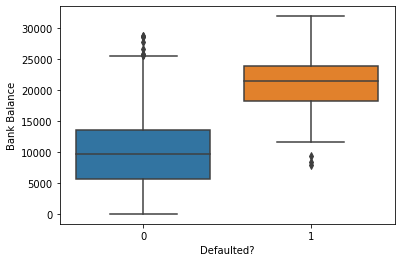

In [11]:
sns.boxplot(x=df['Defaulted?'],y=df['Bank Balance'])

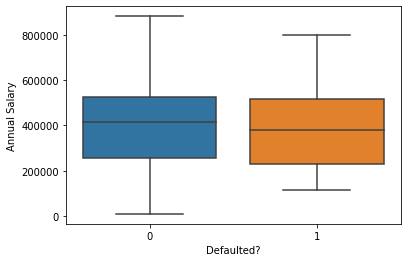

In [12]:
sns.boxplot(x=df['Defaulted?'],y=df['Annual Salary'])

**Visualizing Categorical Variables**

In [13]:
cat_col = ['Employed','Defaulted?']

In [14]:
df.Employed.value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

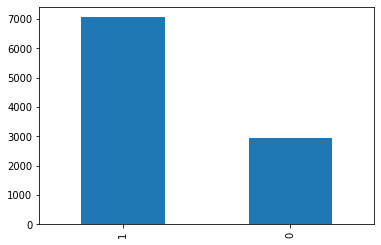

In [15]:
df.Employed.value_counts().plot(kind="bar")

In [16]:
df['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

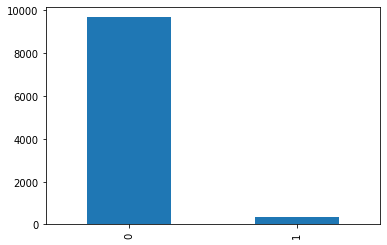

In [17]:
df['Defaulted?'].value_counts().plot(kind="bar")

# **5.Splitting the Dataset**

 **Splitting the Dataset into Dependent and Independent variables**

In [18]:
x = df.iloc[:,0:3]
y = df.iloc[:,3:]

In [19]:
x.head()

,Employed,Bank Balance,Annual Salary
Index,,,
1,1,8754.36,532339.56
2,0,9806.16,145273.56
3,1,12882.60,381205.68
4,1,6351.00,428453.88
5,1,9427.92,461562.00


In [20]:
y.head()

,Defaulted?
Index,
1,0
2,0
3,0
4,0
5,0


 **Splitting the Dataset into Train set and Test set**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## **6.Feature Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train[:,:3]

array([[ 0.64407095,  0.36631478, -0.17572602],
       [ 0.64407095,  0.47397225,  0.42065699],
       [-1.55262397,  2.36482853, -0.86656232],
       ...,
       [-1.55262397, -0.30190471, -1.46613975],
       [-1.55262397, -1.63267643, -1.47435645],
       [ 0.64407095, -1.02739898,  1.39868237]])

## **7.Training the model with Kernel Support Vector Machine**

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## **8.Accuracy Score and Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2402    2]
 [  76   20]]


0.9688

## **9.Applying K-Fold Cross Validation to the Model**

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

**Mean Accuracy and the Standard Deviation in Accuracy**

In [27]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.16 %
Standard Deviation: 0.27 %


**Note : The Mean Accuracy is higher than the Accuracy score we got in same model before . This is certainly a bias . Simply put K-Fold Cross Validation helps us solve the trade off Between Bias and Variance . Also note that our previous Accuracy score is still within the range predicted by K-Fold Cross Validation (given by STD)**

# **10.Applying Grid Search to the Model for Parameter Tuning**

**Grid Search helps us get the best Parameters that has the highest Accuracy Score for any given Model . Which is nothing but Parameter Tuning. Finding the Best set of Parameters Individually consumes alot time and energy**

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Best Accuracy by the Model and the Corresponding Parameters to get that Accuracy**

In [29]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.25 %
Best Parameters: {'C': 0.75, 'gamma': 0.6, 'kernel': 'rbf'}


# **11.Training the model with XG Boost Classifier**

**XGBoost although a Model Booster , is used like a Classifier/Regressor.It is Beleived to give the highest Accuracy. Lets check that now.**

In [30]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier()
classifier1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
y_pred1 = classifier.predict(x_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[2402    2]
 [  76   20]]


0.9688

**Seems like both SVM and XGBoost have the same Accuracy.But as we discussed above , there may be bias . Just to be sure lets Apply K-Fold Cross Validation to this Model as well.**

## **12.Applying K-Fold Cross Validation for the Boosted Model**

In [32]:
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.28 %
Standard Deviation: 0.42 %


**Seems like XGBoost beats KSVM by a very Slight Margin . But also note that , the STD in XGB Model is higher than the KSVM Model.**